In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
%matplotlib inline

2025-06-15 10:16:48.629895: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 10:16:48.632671: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 10:16:48.640880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749979008.655199   95611 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749979008.659182   95611 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749979008.671000   95611 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [4]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32,
input_length=max_len))
model.add(SimpleRNN(units=32))
model.add(Dense(1, activation='sigmoid'))

/home/nambanumben/Code/mtech/deep_learning/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-15 10:16:57.343018: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6063 - loss: 0.6397 - val_accuracy: 0.7300 - val_loss: 0.5518
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8168 - loss: 0.4076 - val_accuracy: 0.8526 - val_loss: 0.3727
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9062 - loss: 0.2425 - val_accuracy: 0.8562 - val_loss: 0.3664
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9211 - loss: 0.2074 - val_accuracy: 0.8460 - val_loss: 0.4377
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9020 - loss: 0.2330 - val_accuracy: 0.8372 - val_loss: 0.4598
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9709 - loss: 0.0940 - val_accuracy: 0.8134 - val_loss: 0.5251
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9866 - loss: 0.0465 - val_accuracy: 0.8108 - val_loss: 0.6289
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9906 - loss: 0.0346 - val_accu

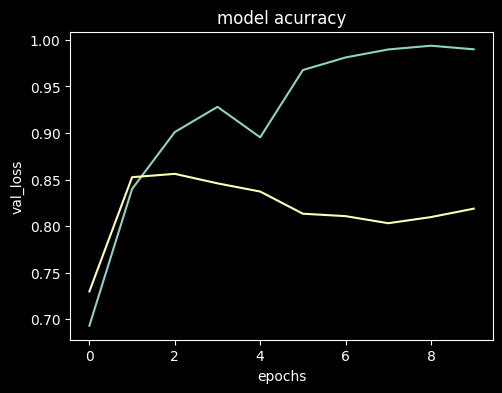

In [7]:
# model.save_weight9s('sentiment_model.weights.h5')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training acuracy')
plt.plot(history.history['val_accuracy'], label='validation acuracy')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.title('model acurracy')
plt.show()

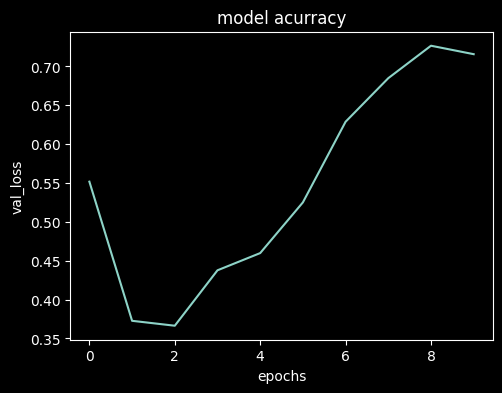

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='training acuracy')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.title('model acurracy')
plt.show()

In [9]:
print("Loading word index...")
word_index = imdb.get_word_index()
print("Word index loaded.")

Loading word index...
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Word index loaded.


In [10]:
def preprocess_user_input(text, word_index, vocab_size, max_len):
    """
    Converts a raw text string into a preprocessed sequence of integers
    that the model can understand.
    """
    print(f"Original text: '{text}'")

    # 1. Tokenize the text (convert to lowercase and split into words)
    words = text.lower().split()
    print(f"Tokenized words: {words}")

    # 2. Convert words to integers using the word_index
    # We'll start our sequence with the <SOS> (start of sequence) token, which is 1
    encoded_review = [1] # <SOS> token

    for word in words:
        # Get the integer index for the word, default to None if not found
        idx = word_index.get(word)
        if idx is not None:
            # Apply the offset (because 0, 1, 2 are reserved)
            current_idx = idx + 3
            if current_idx < vocab_size: # Check if the word is within our specified vocab_size
                encoded_review.append(current_idx)
            else:
                # If the word's index is >= vocab_size, it's considered too rare
                encoded_review.append(2) # <UNK> token
        else:
            # If the word is not in word_index at all, it's also "unknown"
            encoded_review.append(2) # <UNK> token
    
    # print(f"Encoded review (before padding): {encoded_review}")

    padded_review = pad_sequences([encoded_review], maxlen=max_len, padding='pre', truncating='pre')
    print(f"Padded review (shape: {padded_review.shape}): {padded_review}")
    
    return padded_review

In [11]:
print("\n--- Movie Review Sentiment Analyzer ---")
try:
    while True:
        user_review = input("Enter a movie review (or type 'quit' to exit): ")
        if user_review.lower() == 'quit':
            break
        if not user_review.strip():
            print("Please enter some text.")
            continue

        # Preprocess the user's review
        processed_input = preprocess_user_input(user_review, word_index, vocab_size, max_len)

        # Make a prediction
        # model.predict() returns a 2D array, e.g., [[0.98]]
        # We need to access the actual prediction value.
        prediction_probability = model.predict(processed_input)[0][0]
        
        print(f"Raw prediction probability: {prediction_probability:.4f}")

        # Interpret the prediction
        if prediction_probability > 0.5:
            sentiment = "Positive"
        else:
            sentiment = "Negative"
            
        print(f"Predicted sentiment: {sentiment}\n")

except NameError:
    print("\nError: The 'model' variable is not defined.")
    print("Please ensure you have defined, compiled, AND TRAINED your Keras model before this step.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

print("Sentiment analyzer finished.")


--- Movie Review Sentiment Analyzer ---
Original text: 'Iron Man'
Tokenized words: ['iron', 'man']
Padded review (shape: (1, 200)): [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   